# Hands-on 1

## Preliminary

First of all, let's see if your qiskit installation is working. If not, please follow the instructions for installing qiskit in your own pc using _conda_, or run this book in the _IBM cloud_ directly.

In [1]:
import qiskit.tools.jupyter
%qiskit_version_table

## Exploring Qubits with Qiskit

Classical bits always have a completely well-defined state: they are either 0 or 1 at every point during a computation. There is no more detail we can add to the state of a bit than this. So to write down the state of a of classical bit `(c)`, we can just use these two binary values. For example:

$$
c = 0
$$

This restriction is lifted for quantum bits. Whether we get a $0$ or a $1$ from a qubit only needs to be well-defined when a measurement is made to extract an output. At that point, it must commit to one of these two options. At all other times, its state will be something more complex than can be captured by a simple binary value.

To see how to describe these, we can first focus on the two simplest cases. It is possible to prepare a qubit in a state for which it definitely gives the outcome $0$ when measured.

We need a name for this state. Let's be unimaginative and call it *0*. Similarly, there exists a qubit state that is certain to output a $1$. We'll call this *1*. These two states are completely mutually exclusive. Either the qubit definitely outputs a $0$, or it definitely outputs a $1$. There is no overlap. One way to represent this with mathematics is to use two orthogonal vectors.

$$
\left|0\right\rangle= \begin{pmatrix} 1 \\ 0 \end{pmatrix} \qquad \left|1\right\rangle= \begin{pmatrix} 0 \\ 1 \end{pmatrix}
$$

With vectors we can describe more complex states than just $\left|0\right\rangle$ and $\left|1\right\rangle$. For example, consider the vector

$$
\left|q_0\right\rangle= \begin{pmatrix} \frac{1}{\sqrt{2}}  \\ \frac{i}{\sqrt{2}} \end{pmatrix}
$$

Since the states $\left|0\right\rangle$ and $\left|1\right\rangle$ form an orthonormal basis, we can represent any 2D vector with a combination of these two states. This allows us to write the state of our qubit in the alternative form:

$$
\left|q_0\right\rangle = \frac{1}{\sqrt{2}} \left|0\right\rangle + \frac{i}{\sqrt{2}} \left|1\right\rangle
$$

This vector, $\left|q_0\right\rangle$ is called the qubit's _statevector_, it tells us everything we could possibly know about this qubit. For now, we are only able to draw a few simple conclusions about this particular example of a statevector: it is not entirely $\left|0\right\rangle$ and not entirely $\left|1\right\rangle$. Instead, it is described by a linear combination of the two. In quantum mechanics, we typically describe linear combinations such as this using the word 'superposition'.

Though our example state $\left|q_0\right\rangle$ can be expressed as a superposition of $\left|0\right\rangle$ and $\left|1\right\rangle$, it is no less a definite and well-defined qubit state than they are. To see this, we can begin to explore how a qubit can be manipulated

First, we need to import all the tools we will need:

In [2]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In Qiskit, we use the `QuantumCircuit` object to store our circuits, this is essentially a list of the quantum operations on our circuit and the qubits they are applied to.

In [3]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit

In our quantum circuits, our qubits always start out in the state $\left|q_0\right\rangle$. We can use the `initialize()` method to transform this into any state. We give `initialize()` the vector we want in the form of a list, and tell it which qubit(s) we want to initialize in this state:

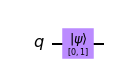

In [5]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw('mpl')  # Let's view our circuit

We can then use one of Qiskit’s simulators to view the resulting state of our qubit.

In [6]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

To get the results from our circuit, we use run to execute our circuit, giving the circuit and the backend as arguments. We then use `.result()` to get the result of this:

In [7]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.save_statevector()   # Tell simulator to save statevector
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result

from result, we can then get the final statevector using `.get_statevector()`:

In [8]:
out_state = result.get_statevector()
print(out_state) # Display the output state vector

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


*Note:* Python uses $j$ to represent $i$ in complex numbers. We see a vector with two complex elements: $0.+0.j = 0$, and $1.+0.j = 1$.

Let’s now measure our qubit as we would in a real quantum computer and see the result:

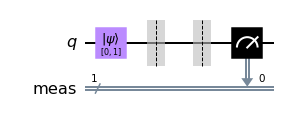

In [9]:
qc.measure_all()
qc.draw('mpl')

This time, instead of the statevector we will get the counts for the $0$ and $1$ results using `.get_counts()`:

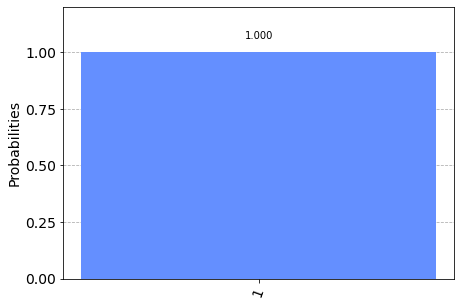

In [10]:
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

We can see that we (unsurprisingly) have a 100% chance of measuring $\left|1\right\rangle$. This time, let’s instead put our qubit into a superposition and see what happens. We will use the state $\left|q_0\right\rangle$ from earlier :

$$
\left|q_0\right\rangle = \frac{1}{\sqrt{2}} \left|0\right\rangle + \frac{i}{\sqrt{2}} \left|1\right\rangle
$$

We need to add these amplitudes to a python list. To add a complex amplitude, Python uses $j$ for the imaginary unit (we normally call it $i$ mathematically):

In [11]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>

And we then repeat the steps for initialising the qubit as before:

In [12]:
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.save_statevector() # Save statevector
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
print(state)           # Print the result

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


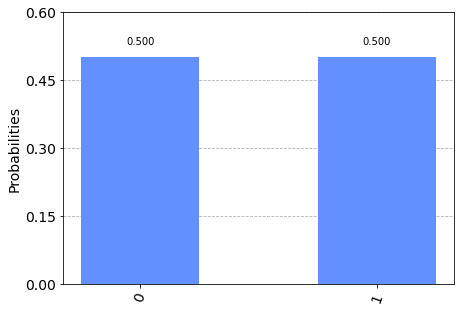

In [13]:
qobj = assemble(qc)
results = sim.run(qobj).result().get_counts()
plot_histogram(results)

We can see we have equal probability of measuring either $\left|0\right\rangle$ or $\left|1\right\rangle$. To explain this, we need to talk about measurement.

##  The Rules of Measurement

Remember: To find the probability of measuring a state $\left|\psi\right\rangle$ in the state $\left|x\right\rangle$ we do:

$$
p\left(\left|x\right\rangle\right)=\left|\left\langle x\middle|\psi\right\rangle\right|^2
$$

In the equation above, $\left|x\right\rangle$ can be any qubit state. To find the probability of measuring $\left|x\right\rangle$, we take the inner product of $\left|x\right\rangle$ and the state we are measuring (in this case $\left|\psi\right\rangle$), then square the magnitude. This may seem a little convoluted, but it will soon become second nature.

If we look at the state $\left|q_0\right\rangle$ from before, we can see the probability of measuring $\left|0\right\rangle$ is indeed $0.5$ :

$$
\begin{aligned}
\left|q_0\right\rangle &= \frac{1}{\sqrt{2}} \left|0\right\rangle + \frac{i}{\sqrt{2}} \left|1\right\rangle \\
\left\langle 0 \middle|q_0\right\rangle &= \frac{1}{\sqrt{2}} \left\langle 0 \middle|0\right\rangle + \frac{i}{\sqrt{2}} \left\langle 0 \middle|1\right\rangle \\
.&=\frac{1}{\sqrt{2}}\\
\left|\left\langle 0 \middle|q_0\right\rangle\right|^2 &=\frac{1}{2}
\end{aligned}
$$

This rule governs how we get information out of quantum states. It is therefore very important for everything we do in quantum computation. It also immediately implies several important facts

#### Normalisation

The rule shows us that amplitudes are related to probabilities. If we want the probabilities to add up to 1 (which they should!), we need to ensure that the statevector is properly normalized. Specifically, we need the magnitude of the state vector to be 1.

$$
\left\langle \psi \middle|\psi\right\rangle=1
$$

Thus if:

$$
\left|\psi\right\rangle = \alpha \left|0\right\rangle + \beta \left|1\right\rangle
$$

Then:

$$
\left|\alpha\right|^2+\left|\beta\right|^2=1
$$

This explains the factors of $\sqrt{2}$ you have seen throughout this hands-on. In fact, if we try to give `initialize()` a vector that isn’t normalised, it will give us an error:

In [14]:
vector = [1,1]
qc.initialize(vector, 0)

QiskitError: 'Sum of amplitudes-squared does not equal one.'

#### In class exercise
1. Create a state vector that will give a 1/3 probability of measuring $\left|0\right\rangle$.
2. Create a different state vector that will give the same measurement probabilities.
3. Verify that the probability of measuring \left|1\right\rangle for these two states is 2/3.

In [15]:
##Fill me

#### Alternative measurement
The measurement rule gives us the probability $p\left(\left|x\right\rangle\right)$ that a state $\left|\psi\right\rangle$ is measured as $\left|x\right\rangle$. Nowhere does it tell us that $\left|x\right\rangle$ can only be either $\left|0\right\rangle$ or $\left|1\right\rangle$.

The measurements we have considered so far are in fact only one of an infinite number of possible ways to measure a qubit. For any orthogonal pair of states, we can define a measurement that would cause a qubit to choose between the two.

This possibility will be explored more in the next section. For now, just bear in mind that $\left|x\right\rangle$ is not limited to being simply $\left|0\right\rangle$ or $\left|1\right\rangle$.

#### Global Phase
We know that measuring the state $\left|1\right\rangle$  will give us the output $1$ with certainty. But we are also able to write down states such as

$$
\begin{pmatrix} 0 \\ i \end{pmatrix}=i\left|1\right\rangle.
$$

To see how this behaves, we apply the measurement rule.

$$
\left|\left\langle x \right| \left(i \left|1\right\rangle\right)\right|^2=\left|i\left\langle x\middle|1\right\rangle\right|^2=\left|\left\langle x\middle|1\right\rangle\right|^2
$$

Here we find that the factor of $i$ disappears once we take the magnitude of the complex number. This effect is completely independent of the measured state $\left|x\right\rangle$. It does not matter what measurement we are considering, the probabilities for the state $i\left|1\right\rangle$ are identical to those for $\left|1\right\rangle$. Since measurements are the only way we can extract any information from a qubit, this implies that these two states are equivalent in all ways that are physically relevant.

More generally, we refer to any overall factor $\gamma$ on a state for which $\left|\gamma\right|=1$ as a 'global phase'. States that differ only by a global phase are physically indistinguishable.

$$
\left|\left\langle x \right| \left(\gamma \left|\alpha\right\rangle\right)\right|^2=\left|\gamma\left\langle x\middle|\alpha\right\rangle\right|^2=\left|\left\langle x\middle|\alpha\right\rangle\right|^2
$$

Note that this is distinct from the phase difference between terms in a superposition, which is known as the 'relative phase'. This becomes relevant once we consider different types of measurement and multiple qubits.



##### The Observer Effect

We know that the amplitudes contain information about the probability of us finding the qubit in a specific state, but once we have measured the qubit, we know with certainty what the state of the qubit is. For example, if we measure a qubit in the state:

$$
\left|q\right\rangle = \alpha \left|0\right\rangle + \beta \left|1\right\rangle
$$

And find it in the state $\left|0\right\rangle$, if we measure again, there is a 100% chance of finding the qubit in the state $\left|0\right\rangle$. This means the act of measuring changes the state of our qubits.

$$
\left|q\right\rangle=\begin{pmatrix} \alpha \\ \beta \end{pmatrix} \xrightarrow{\text{Measure } \left|0\right\rangle} \left|q\right\rangle=\left|0\right\rangle=\begin{pmatrix} 1 \\ 0 \end{pmatrix}
$$

We sometimes refer to this as collapsing the state of the qubit. It is a potent effect, and so one that must be used wisely. For example, were we to constantly measure each of our qubits to keep track of their value at each point in a computation, they would always simply be in a well-defined state of either $\left|0\right\rangle$ or $\left|1\right\rangle$. As such, they would be no different from classical bits and our computation could be easily replaced by a classical computation. To achieve truly quantum computation we must allow the qubits to explore more complex states. Measurements are therefore only used when we need to extract an output. This means that we often place all the measurements at the end of our quantum circuit.

We can demonstrate this using Qiskit’s statevector simulator. Let's initialize a qubit in superposition:

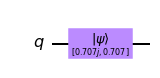

In [16]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.draw('mpl')

This should initialize our qubit in the state:

$$
\left|q_0\right\rangle = \frac{i}{\sqrt{2}} \left|0\right\rangle + \frac{1}{\sqrt{2}} \left|1\right\rangle
$$

We can verify this using the simulator:

In [17]:
qc.save_statevector()
result = sim.run(assemble(qc)).result()
state = result.get_statevector()
print("Qubit State = " + str(state))

Qubit State = Statevector([0.        +0.70710678j, 0.70710678+0.j        ],
            dims=(2,))


We can see here the qubit is initialized in the state [0.+0.70710678j 0.70710678+0.j], which is the state we expected.

Let’s now create a circuit where we measure this qubit

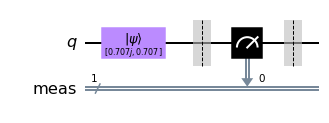

In [18]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.measure_all()
qc.save_statevector()
qc.draw('mpl')

When we simulate this entire circuit, we can see that one of the amplitudes is always $0$:

In [19]:
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


You can re-run this cell a few times to reinitialize the qubit and measure it again. You will notice that either outcome is equally probable, but that the state of the qubit is never a superposition of $\left|0\right\rangle$ and $\left|1\right\rangle$. Somewhat interestingly, the global phase on the state $\left|0\right\rangle$ survives, but since this is global phase, we can never measure it on a real quantum computer.

#### A Note about Quantum Simulators

We can see that writing down a qubit’s state requires keeping track of two complex numbers, but when using a real quantum computer we will only ever receive a yes-or-no (0 or 1) answer for each qubit. The output of a 10-qubit quantum computer will look like this:

$$
0110111110
$$

Just 10 bits, no superposition or complex amplitudes. When using a real quantum computer, we cannot see the states of our qubits mid-computation, as this would destroy them! This behaviour is not ideal for learning, so Qiskit provides different quantum simulators: By default, the `aer_simulator` mimics the execution of a real quantum computer, but will also allow you to peek at quantum states before measurement if we include certain instructions in our circuit. For example, here we have included the instruction `.save_statevector()`, which means we can use `.get_statevector()` on the result of the simulation.

## The Bloch Sphere

We saw earlier in this chapter that the general state of a qubit $\left|q\right\rangle$ is:

$$
\left|q\right\rangle = \alpha \left|0\right\rangle + \beta \left|1\right\rangle \\
\alpha,\beta \in \mathbb C
$$

(The second line tells us $\alpha$ and $\beta$ are complex numbers). We know that we cannot differentiate between some of these states. This means we can be more specific in our description of the qubit.

Firstly, since we cannot measure global phase, we can only measure the difference in phase between the states $\left|0\right\rangle$ and $\left|1\right\rangle$. Instead of having $\alpha$ and $\beta$ be complex, we can confine them to the real numbers and add a term to tell us the relative phase between them:

$$
\left|q\right\rangle = \alpha \left|0\right\rangle + e^{i\phi}\beta \left|1\right\rangle \\
\alpha,\beta,\phi \in \mathbb R
$$

Finally, since the qubit state must be normalised, i.e.

$$
\sqrt{\alpha^2+\beta^2}=1
$$

we can use the trigonometric identity:

$$
\sqrt{\sin^2 x+\cos^2 x}=1
$$

to describe the real $\alpha$ and $\beta$ in terms of one variable, $\theta$ :

$$
\alpha=\cos\frac{\theta}{2}\qquad \beta=\sin\frac{\theta}{2}
$$

From this we can describe the state of any qubit using the two variables $\phi$ and $\theta$ :

$$
\left|q\right\rangle = \cos\frac{\theta}{2} \left|0\right\rangle + e^{i\phi}\sin\frac{\theta}{2} \left|1\right\rangle \\
\theta,\phi \in \mathbb R
$$

If we interpret $\phi$ and $\theta$ as spherical co-ordinates ($r=1$, since the magnitude of the qubit state is 1), we can plot any single qubit state on the surface of a sphere, known as the _Bloch sphere_.

Below we have plotted a qubit in the state $\left|+\right\rangle$. In this case, $\theta=\pi/2$ and $\phi=0$.

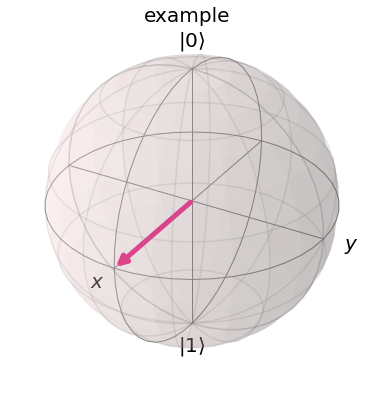

In [20]:
plot_bloch_vector(bloch=[1,pi/2,0],title='example',coord_type='spherical')

## In Class Exercise

Use `plot_bloch_vector()` to plot a qubit in the states:

1. $\left|0\right\rangle$
2. $\left|1\right\rangle$
3. $\frac{1}{\sqrt 2}\left(\left|0\right\rangle+\left|1\right\rangle\right)$
4. $\frac{1}{\sqrt 2}\left(\left|0\right\rangle-i\left|1\right\rangle\right)$
5. $\frac{1}{\sqrt 2} \begin{pmatrix} i \\ 1 \end{pmatrix} $

In [ ]:
### Fill me

## Your first multi-qubit quantum circuit

In a circuit, we typically need to do three jobs: First, encode the input, then do some actual computation, and finally extract an output. For your first quantum circuit, we'll focus on the last of these jobs. We start by creating a quantum circuit with 3 qubits and 3 outputs. Finally the method qc.draw() creates a drawing of the circuit for us. Jupyter Notebooks evaluate the last line of a code cell and display it below the cell. Since `qc.draw()` returns a drawing, that’s what we’re seeing under the code. There are no gates in our circuit yet, so we just see some horizontal lines.  (_Return_ is another word for 'output'. In Python, we can use returned data as input to another function or process.)

In [ ]:
from qiskit import QuantumCircuit
# Create quantum circuit with 3 qubits and 3 classical bits
# (we'll explain why we need the classical bits later)
qc = QuantumCircuit(3, 3)
qc.draw(output='mpl')  # returns a drawing of the circuit

#### What's a method?
The `QuantumCircuit` class is a set of instructions for representing quantum circuits as bits, but when we want to change one of these circuits, we also need to know how to change the bits accordingly. In Python, objects come with ‘methods’, which are sets of instructions for doing something with that object. In the cell above, the `.draw()` method looks at the circuit we’ve created and produces a human-readable drawing of that circuit.

Next, we need a way to tell our quantum computer to measure our qubits and record the results. To do this, we add a "measure" operation to our quantum circuit. We can do this with the `QuantumCircuit`'s `.measure()` method.

In [ ]:
# measure qubits 0, 1 & 2 to classical bits 0, 1 & 2 respectively
qc.measure([0,1,2], [0,1,2])
qc.draw(output='mpl')

Next, let's see what the results of running this circuit would be. To do this, we'll use a quantum simulator, which is a standard computer calculating what an ideal quantum computer would do. Because simulating a quantum computer is believed to be difficult for classical computers (the best algorithms we have grow exponentially with the number of qubits), these simulations are only possible for circuits with small numbers of qubits (up to ~30 qubits), or certain types of circuits for which we can use some tricks to speed up the simulation. Simulators are very useful tools for designing smaller quantum circuits.

Let's import Qiskit’s simulator (called Aer), and make a new simulator object.

In [ ]:
from qiskit.providers.aer import AerSimulator
sim = AerSimulator()  # make new simulator object

To do the simulation, we can use the simulators `.run()` method. This returns a "job", which contains information about the experiment, such as whether the experiment is running or completed, what backend we ran the experiment on, and importantly for us, what the results of the experiment are!

To get the results from the job, we use the results method, and the most popular way to view the results is as a dictionary of "counts".

In [ ]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
counts = result.get_counts()    # interpret the results as a "counts" dictionary
print(counts)

The keys in counts dictionary are bit-strings, and the values are the number of times that bit-string was measured. Quantum computers can have randomness in their results, so it's common to repeat the circuit a few times. This circuit was repeated 1024 times, which is the default number of times to repeat a circuit in Qiskit. By convention, qubits always start in the state 0, and since we are doing nothing to them before measurement, the results are always `0`. This is not always the case. In actual situations, you will need a statistical method to analyse the output. Qiskit also provides a function `plot_histogram`, which allows you to view the outcomes.

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)


### Basics of encoding an input

Now let's look at how to encode a different binary string as an input. For this, we need what is known as a NOT gate. This is the most basic operation that you can do in a computer. It simply flips the bit value: 0 becomes 1 and 1 becomes 0. For qubits, we use a gate known as the _X-gate_ for this.

Below, we’ll create a new circuit dedicated to the job of encoding:

In [ ]:
# Create quantum circuit with 3 qubits and 3 classical bits:
qc = QuantumCircuit(3, 3)
qc.x([0,1])  # Perform X-gates on qubits 0 & 1
qc.measure([0,1,2], [0,1,2])
qc.draw('mpl')    # returns a drawing of the circuit

And let's simulate our circuit to see the results:

In [ ]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
counts=result.get_counts()    # interpret the results as a "counts" dictionary
print(counts)

In [ ]:
plot_histogram(counts)